# **Regression Task (MR - Model 2) -> Predict the exact band gap (Eg in eV) for insulators only.**

Fitting 5 folds for each of 108 candidates, totalling 540 fits


<ipython-input-6-f319bb90dd11>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insulators[col] = encoder.fit_transform(df_insulators[col])
<ipython-input-6-f319bb90dd11>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insulators[col] = encoder.fit_transform(df_insulators[col])
<ipython-input-6-f319bb90dd11>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Mean Absolute Error (MAE): 0.2004
Mean Squared Error (MSE): 0.1132
Root Mean Squared Error (RMSE): 0.3365
R-squared (R²): 0.8334
Mean Absolute Percentage Error (MAPE): 14.35%

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


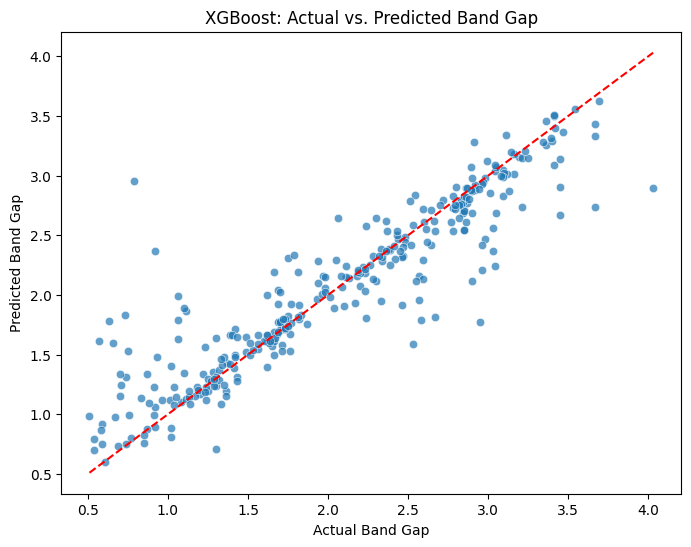


Model saved as 'band_gap_model.pkl'
Scaler saved as 'scaler.pkl1'
Scaler saved as 'label_encoder.pkl'


In [6]:
#MODEL 2(REGRESSION)-> XGBoost with GridSearchCV (BETTER ACCURACY)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import pickle


file_path = "/content/drive/MyDrive/data_excavate.csv"
df = pd.read_csv(file_path)


df_insulators = df[df['PBE band gap'] > 0.5] #Check Insulator or not

categorical_cols = ['functional group', 'A', "A'", 'Bi', "B'"]
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['PBE band gap']]

encoder = LabelEncoder()
for col in categorical_cols:
    df_insulators[col] = encoder.fit_transform(df_insulators[col])

correlation_matrix = df_insulators.corr() #Feature Selection
cor_target = correlation_matrix["PBE band gap"].abs().sort_values(ascending=False)
selected_features = cor_target[cor_target > 0.1].index.tolist()

X = df_insulators[selected_features].drop(columns=["PBE band gap"])
y = df_insulators["PBE band gap"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # XGBoost model

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print("\nBest Hyperparameters:", grid_search.best_params_)

# Plot predicted vs actual band gap values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("Actual Band Gap")
plt.ylabel("Predicted Band Gap")
plt.title("XGBoost: Actual vs. Predicted Band Gap")
plt.show()

# Save the trained model
with open("band_gap_model1.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler (for future predictions)
with open("scaler.pkl1", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the LabelEncoder
with open("label_encoder.pkl", "wb") as encoder_file:
    pickle.dump(encoder, encoder_file)


print("\nModel saved as 'band_gap_model.pkl'")
print("Scaler saved as 'scaler.pkl1'")
print("Scaler saved as 'label_encoder.pkl'")

In [2]:
#Dataset Load and Info
import pandas as pd

file_path = "/content/drive/MyDrive/data_excavate.csv"
df = pd.read_csv(file_path)
print("Colulmns of the dataset:",df.columns)
print("No of rows in the dataset: ",df.shape[0])

Colulmns of the dataset: Index(['functional group', 'A', 'A_OS', 'A'', 'A'_OS', 'A_HOMO-', 'A_HOMO+',
       'A_IE-', 'A_IE+', 'A_LUMO-', 'A_LUMO+', 'A_X-', 'A_X+', 'A_Z_radii-',
       'A_Z_radii+', 'A_e_affin-', 'A_e_affin+', 'Bi', 'B_OS', 'B'', 'B'_OS',
       'B_HOMO-', 'B_HOMO+', 'B_IE-', 'B_IE+', 'B_LUMO-', 'B_LUMO+', 'B_X-',
       'B_X+', 'B_Z_radii-', 'B_Z_radii+', 'B_e_affin-', 'B_e_affin+',
       'PBE band gap', 'μ', 'μĀ', 'μ𝐵 ̅', 't'],
      dtype='object')
No of rows in the dataset:  5152
